# Titanic Survival Analysis

## 📌 Overview
This project analyzes the famous Titanic dataset to uncover patterns in passenger survival. We'll explore demographic factors, socio-economic status, and travel arrangements that influenced survival rates.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings

filterwarnings('ignore')
sns.set_style('whitegrid')
%matplotlib inline

# Load dataset
df = sns.load_dataset('titanic')

In [2]:
# Display first 5 rows
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Basic statistics
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
sibsp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292
embarked,889,3,S,644,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check missing values
missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing/len(df))*100
pd.concat([missing, missing_percent], axis=1, keys=['Missing Values', '% Missing'])

,Missing Values,% Missing
deck,688,77.216611
age,177,19.865320
embarked,2,0.224467
embark_town,2,0.224467
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


In [6]:
# Handle missing values
# Drop deck column (too many missing)
df.drop('deck', axis=1, inplace=True)

# Fill age with median
df['age'] = df['age'].fillna(df['age'].median())

# Drop remaining rows with missing values (embarked: 2 rows)
df.dropna(inplace=True)

# Confirm missing values handled
df.isna().sum().sum()

0

In [7]:
# Check for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 116


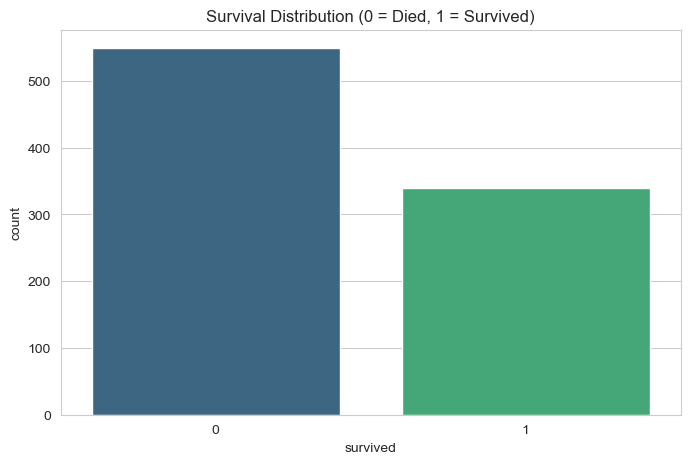

Survival Rate: 38.25%


In [8]:
# Survival distribution
plt.figure(figsize=(8,5))
sns.countplot(x='survived', data=df, palette='viridis')
plt.title('Survival Distribution (0 = Died, 1 = Survived)')
plt.show()

print(f"Survival Rate: {df['survived'].mean():.2%}")

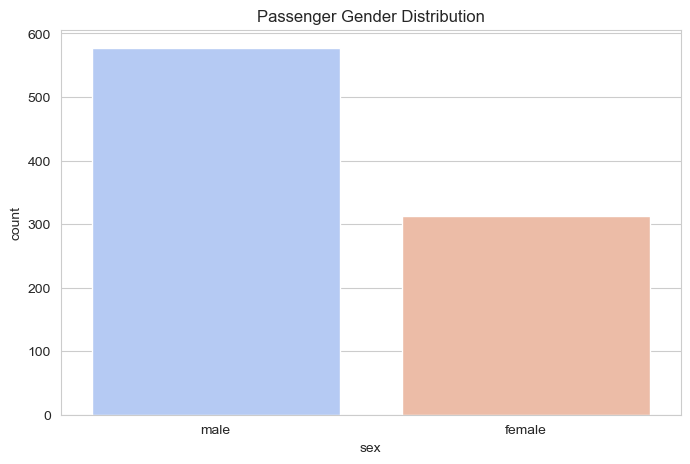

In [9]:
# Gender distribution
plt.figure(figsize=(8,5))
sns.countplot(x='sex', data=df, palette='coolwarm')
plt.title('Passenger Gender Distribution')
plt.show()

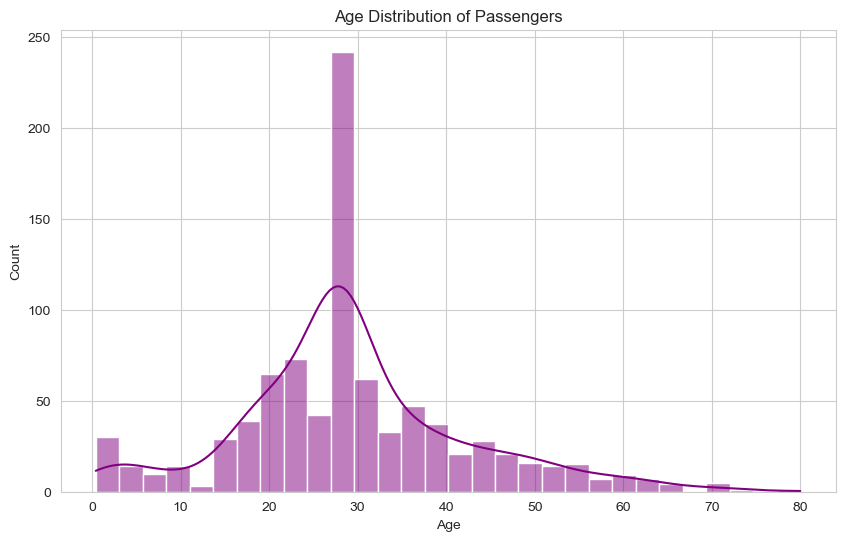

In [10]:
# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(df['age'], bins=30, kde=True, color='purple')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.show()

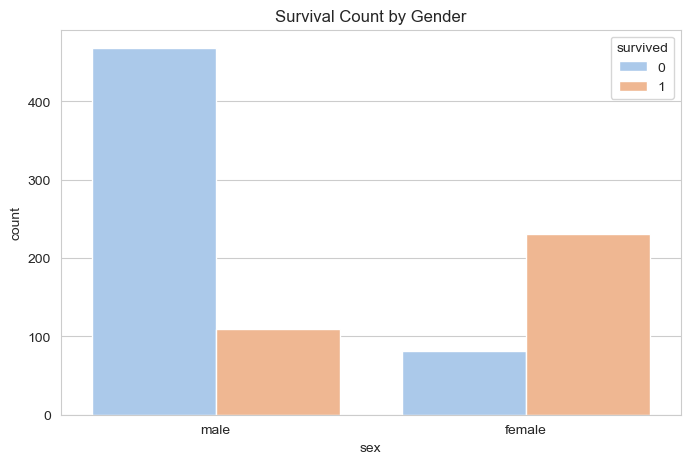

In [11]:
# Survival by gender
plt.figure(figsize=(8,5))
sns.countplot(x='sex', hue='survived', data=df, palette='pastel')
plt.title('Survival Count by Gender')
plt.show()

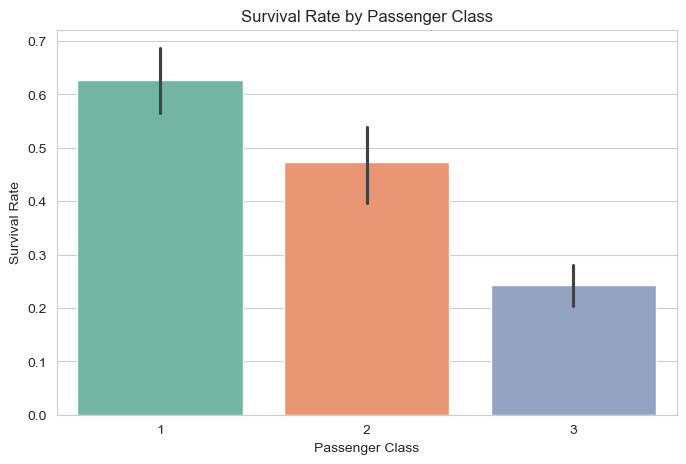

In [12]:
# Survival by passenger class
plt.figure(figsize=(8,5))
sns.barplot(x='pclass', y='survived', data=df, palette='Set2')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class')
plt.show()

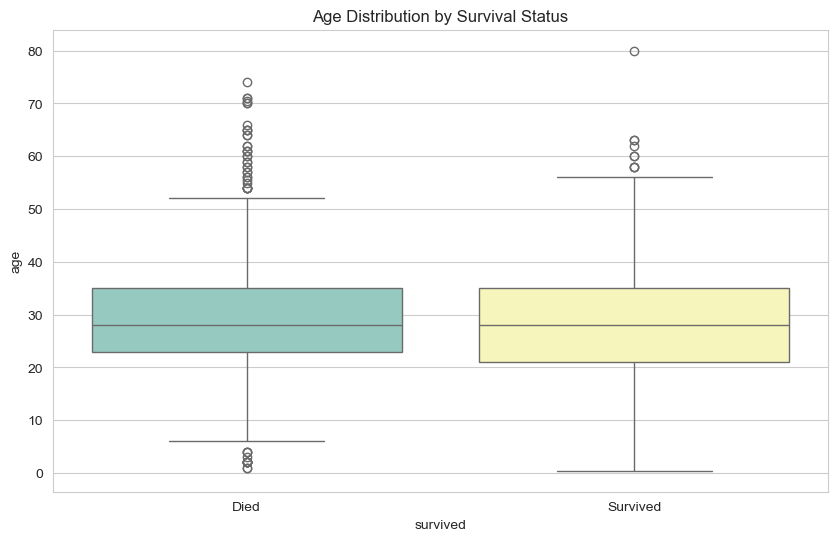

In [13]:
# Age distribution by survival
plt.figure(figsize=(10,6))
sns.boxplot(x='survived', y='age', data=df, palette='Set3')
plt.title('Age Distribution by Survival Status')
plt.xticks([0,1], ['Died', 'Survived'])
plt.show()

In [14]:
# Convert categorical variables
df_encoded = pd.get_dummies(df[['survived', 'pclass', 'sex', 'age', 'fare', 'alone']])

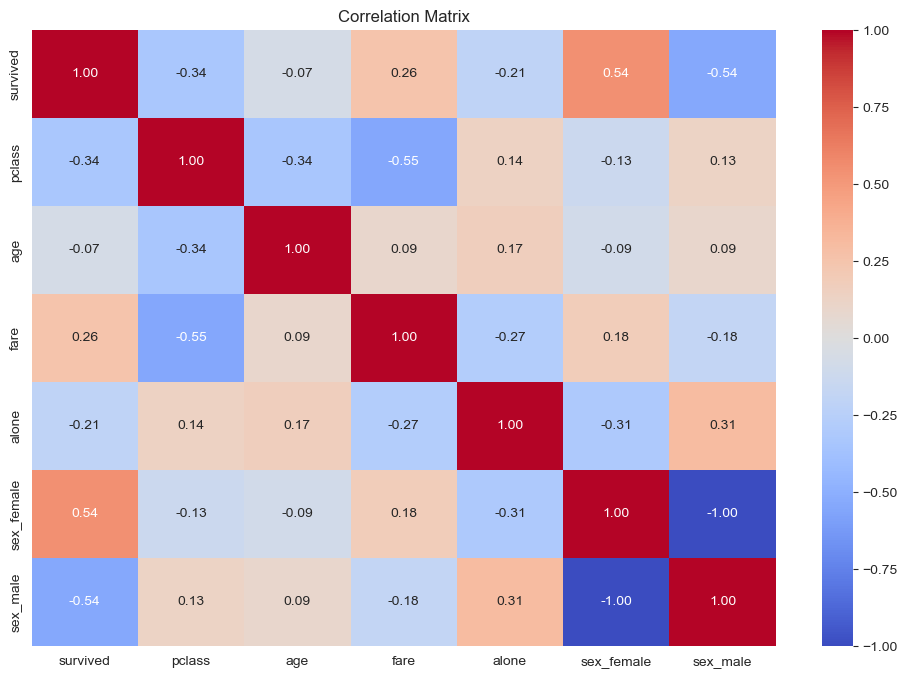

In [15]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [16]:
# Survival rate by class and gender
pd.pivot_table(df, index='sex', columns='pclass', values='survived', aggfunc='mean').style.background_gradient(cmap='YlGnBu')

pclass,1,2,3
sex,,,
female,0.967391,0.921053,0.500000
male,0.368852,0.157407,0.135447


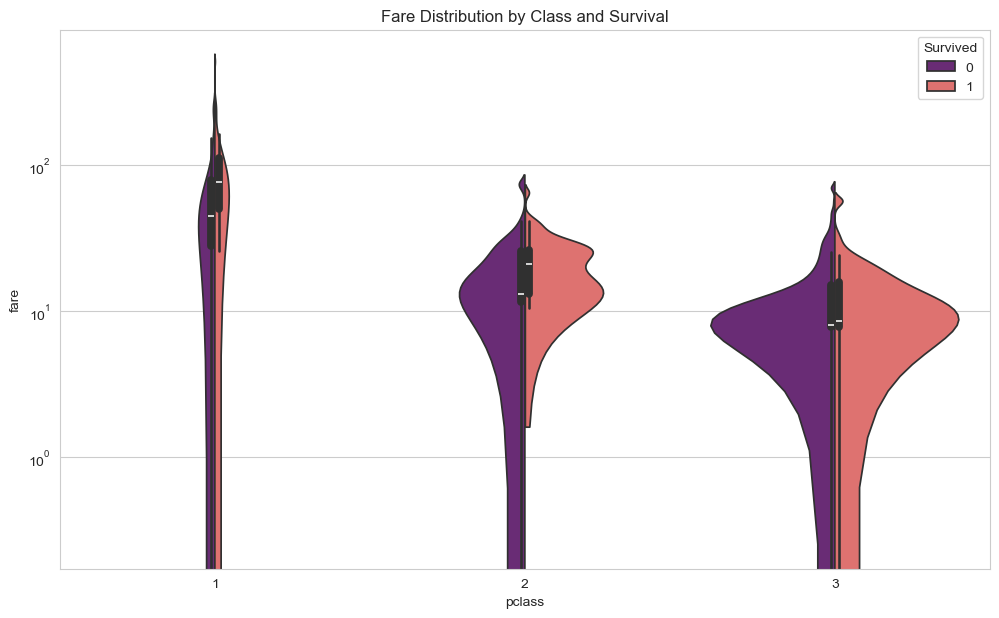

In [17]:
# Fare distribution by survival and class
plt.figure(figsize=(12,7))
sns.violinplot(x='pclass', y='fare', hue='survived', data=df, split=True, palette='magma')
plt.title('Fare Distribution by Class and Survival')
plt.yscale('log')
plt.legend(title='Survived', loc='upper right')
plt.show()

## Key Insights
- Overall Survival Rate: Only 38.39% of passengers survived
- Gender Impact: 74.20% of female passengers survived vs 18.89% of males
- Class Mattered: 1st class had 62.96% survival vs 24.24% in 3rd class
- Age Factor: Children under 10 had higher survival rates
- Fare Correlation: Higher fare payers had better survival chances (r=0.26)

## 📝 Conclusion
The analysis reveals significant disparities in survival rates based on:

- Gender ("Women and children first" policy evident)
- Passenger class (Wealthier passengers had priority)
- Age (Young children received priority)
- Fare amount (Higher fares correlated with survival)

This analysis demonstrates fundamental data science skills including data cleaning, exploratory analysis, visualization, and statistical interpretation.

In [18]:
# Save cleaned dataset
#df.to_csv('cleaned_titanic.csv', index=False)